In [2]:
import os

os.getcwd()


'C:\\Users\\patil\\Downloads\\Projects\\pharmacy-demand-forecasting'

In [3]:
import os
os.listdir()


['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 '01_generate_dataset.ipynb',
 '02_data_cleaning.ipynb',
 '03_exploratory_analysis.ipynb',
 '04_demand_forecasting_ml.ipynb.ipynb',
 '30_day_demand_forecast.csv',
 'data',
 'notebooks',
 'pharmacy_dashboard.pbix',
 'pharmacy_sales.csv',
 'pharmacy_sales_cleaned.csv',
 'powerbi',
 'README.md',
 'requirements.txt',
 'requirements.txt.txt',
 'visuals']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("pharmacy_sales_cleaned.csv")
df.head()


,Date,Medicine_Name,Category,Units_Sold,Unit_Price,Revenue,Stock_Available,Supplier,Expiry_Date,City,Year,Month,Expiry_Days
0,01-01-2023,Atorvastatin,Syrup,184,33,6072,370,Abbott,20-07-2023,Pune,2023,1,200
1,02-01-2023,Amoxicillin,Tablet,79,15,1185,187,Abbott,08-11-2023,Hyderabad,2023,1,310
2,03-01-2023,Azithromycin,Capsule,92,48,4416,513,Sun Pharma,09-01-2024,Bangalore,2023,1,371
3,04-01-2023,Pantoprazole,Capsule,165,16,2640,413,Cipla,19-10-2024,Delhi,2023,1,654
4,05-01-2023,Atorvastatin,Syrup,174,32,5568,799,Sun Pharma,03-03-2024,Mumbai,2023,1,423


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df['Month_Number'] = df['Date'].dt.month

df[['Date', 'Month_Number']].head()


,Date,Month_Number
0,2023-01-01,1
1,2023-01-02,1
2,2023-01-03,1
3,2023-01-04,1
4,2023-01-05,1


In [7]:
df['Month_Number'] = df['Date'].dt.month

df[['Date', 'Month_Number']].head()


,Date,Month_Number
0,2023-01-01,1
1,2023-01-02,1
2,2023-01-03,1
3,2023-01-04,1
4,2023-01-05,1


In [8]:
df['Date'].isna().sum()


0

In [13]:
from sklearn.model_selection import train_test_split

X = df[['Month_Number']]
y = df['Units_Sold']



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (584, 1)
Test shape : (147, 1)


In [12]:
df.columns



Index(['Date', 'Medicine_Name', 'Category', 'Units_Sold', 'Unit_Price',
       'Revenue', 'Stock_Available', 'Supplier', 'Expiry_Date', 'City', 'Year',
       'Month', 'Expiry_Days', 'Month_Number'],
      dtype='object')

In [14]:
from sklearn.model_selection import train_test_split

X = df[['Month_Number']]
y = df['Units_Sold']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (584, 1)
Test shape : (147, 1)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
y_pred = model.predict(X_test)


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")


MAE  : 48.89
RMSE : 56.28
MAPE : 115.98%


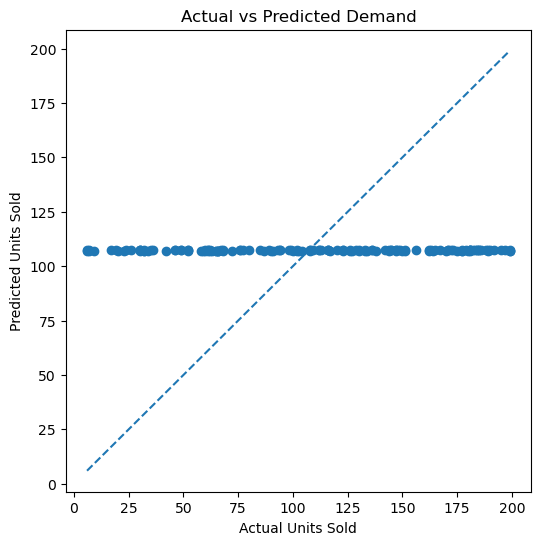

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted Demand")

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.show()
